<h1>Project: Data Analytics Project</h1>

<h2>United Kingdom Road Accident Data Analysis</h2>
<p>Data Analyst: Steven R. Maraig</p>

<h1>Importing Libraries</h1>

In [2]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway

<h1>Creating a Data Frame</h1>

In [3]:
accident = pd.read_csv('accident_data.csv')


In [ ]:
accident.shape

(660679, 14)

In [ ]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h1>Checking Null values</h1>

In [ ]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h1>Handle missing values</h1>

In [ ]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna('Unknown Road Type')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('Unknown Weather Condition')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Changing data type</h1>

In [ ]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [ ]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Accident Date'] = accident['Accident Date'].astype('category')



In [ ]:
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')

In [ ]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'],dayfirst=True, errors='coerce')
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h2>Extracting date information using pandas date time </h2>

In [ ]:
accident['Year'] = accident['Accident Date'].dt.year
accident['month'] = accident['Accident Date'].dt.month
accident['day_of_week'] = accident['Accident Date'].dt.day_name()

<h4>Changing the data type of the new column (nakalimutan ko po ito hehe)</h4>

In [ ]:
accident['Year'] = accident['Year'].astype('category')
accident['month'] = accident['month'].astype('category')
accident['day_of_week'] = accident['Year'].astype('category')

<h2>How many incident happend under light condition during 2022</h2>

<h1>Insight No1. </h1>
<h3>74.64% of the accident occur during 2022 is Daylight conditions, Hypothesis: There are high percentage of accident during daylight conditions</h3>

In [ ]:
during_2019 = accident[accident['Year'] == 2019]
during_2022 = accident[accident['Year'] == 2022]
during_2020 = accident[accident['Year'] == 2020]
during_2021 = accident[accident['Year'] == 2021]
during_2019['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

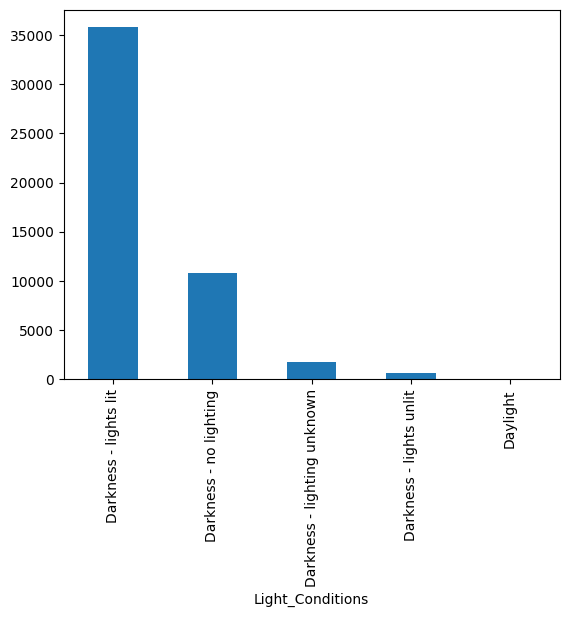

In [ ]:
graph_during_2019 = during_2019['Light_Conditions'].value_counts()
without_light = during_2019[during_2019['Light_Conditions'] !='Daylight']
without_light = without_light['Light_Conditions'].value_counts()
without_light.plot(kind='bar')
plt.show()

<h3>What is the average number of casualties over the following years?</h3>

<h1>Insight No2. </h1>
<h3>Over the period from 2019 to 2022, the data reveals that the average number of casualties per year was approximately 1.3.</h3>

C:\Users\steven\AppData\Local\Temp\ipykernel_20648\390122471.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  casuality_per_year = accident.groupby(['Year'])['Number_of_Casualties'].mean()


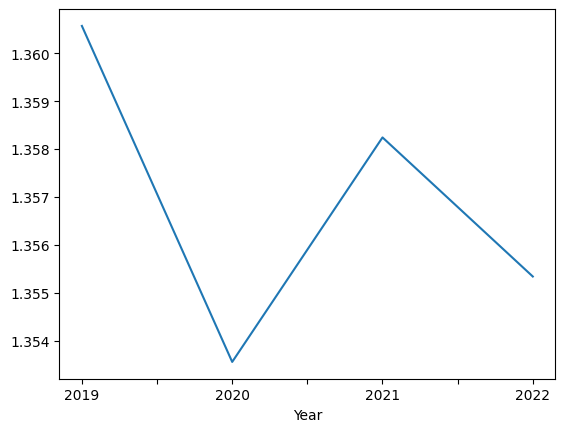

In [ ]:
casuality_per_year = accident.groupby(['Year'])['Number_of_Casualties'].mean()
casuality_per_year.plot(kind='line')
plt.show()


<h3>What is the distribution of accident severity?</h3>


<h1>Insight No3. </h1>
<h3>Vast majority of accidents are 85.34% 'Slight,' There are significantly fewer Serious with 13.35% , and even fewer with Fatal 1.31% accidents, with 8,661 occurrences.</h3>

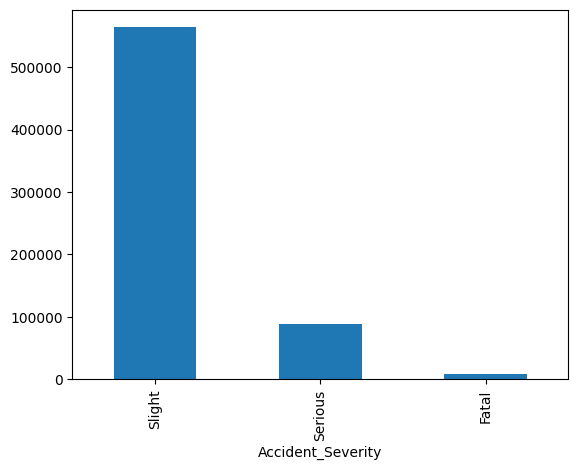

In [ ]:
accident_overall = accident['Accident_Severity'].value_counts()
accident_overall.plot(kind='bar')
plt.show()

<h3>Without Slight severity</h3>


<Axes: xlabel='Accident_Severity'>

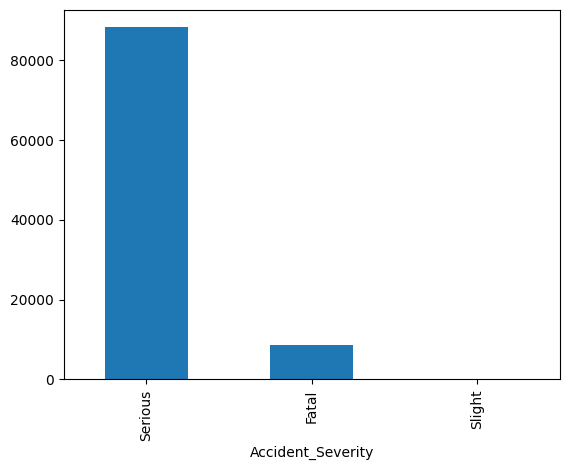

In [ ]:
accident_overall_without = accident[accident['Accident_Severity'] != 'Slight']
accident_overall_without = accident_overall_without['Accident_Severity'].value_counts()
accident_overall_without.plot(kind='bar')

<h3>During 2020 which  areas are most prone to accidents?</h3>


<h1>Insight No4. </h1>
<h3>In rural areas, most accidents are slight, with 50,722 slight accidents compared to 9,774 serious and 1,495 fatal accidents. Urban areas also have many slight accidents (94,402) but with 13,346 serious and 846 fatal accidents</h3>

C:\Users\steven\AppData\Local\Temp\ipykernel_20648\2992759863.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fatality_area = during_2020.groupby(['Urban_or_Rural_Area','Accident_Severity']).size().unstack()


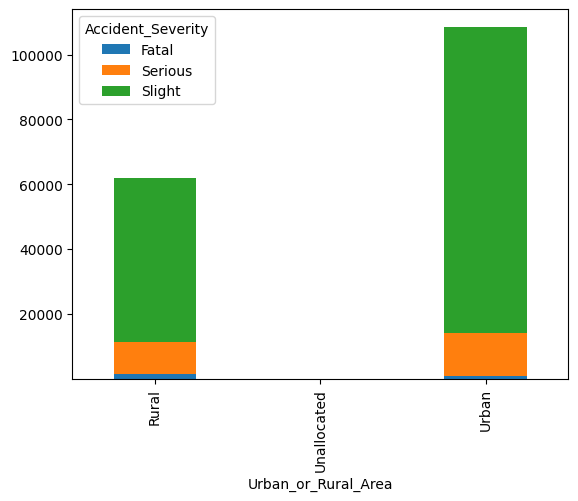

In [ ]:
fatality_area = during_2020.groupby(['Urban_or_Rural_Area','Accident_Severity']).size().unstack()
fatality_area.plot(kind='bar',stacked=True)
plt.show()

<h2>Do vehicle type actually affect the severity of the accident?</h2>


<h1>Insight No5. </h1>
<h3>During 2020 Cars account for 75.7% of all fatalities (1,772 out of 2,341), making them the most accident-prone vehicle type far exceeding other vehicles like buses or coaches (3.9%) and motorcycles over 500cc (4.2%). This highlights the urgent need for targeted safety measures to address car-related risks.</h3>

C:\Users\steven\AppData\Local\Temp\ipykernel_20648\855855454.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle_severity = during_2020.groupby(['Vehicle_Type','Accident_Severity']).size().unstack()


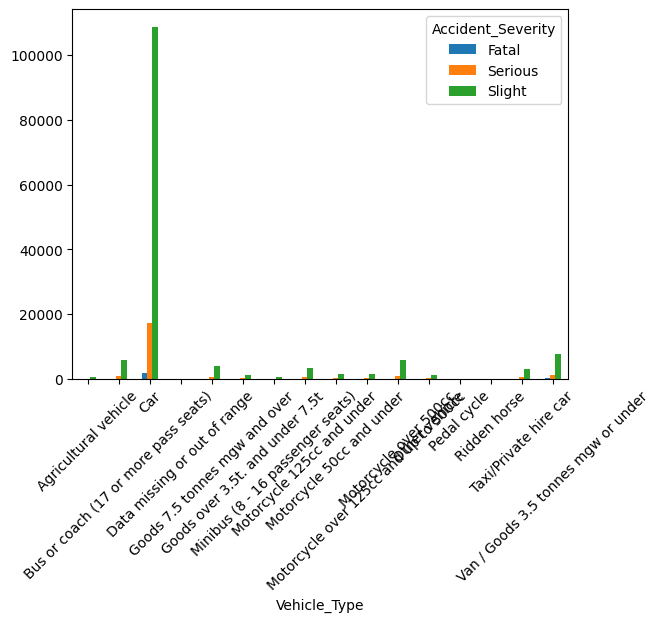

In [ ]:
vehicle_severity = during_2020.groupby(['Vehicle_Type','Accident_Severity']).size().unstack()
vehicle_severity.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

<h1>Removing car from the data </h1>

C:\Users\steven\AppData\Local\Temp\ipykernel_20648\2203517937.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_car_vehicle_severity = no_car.groupby(['Vehicle_Type','Accident_Severity']).size().unstack()


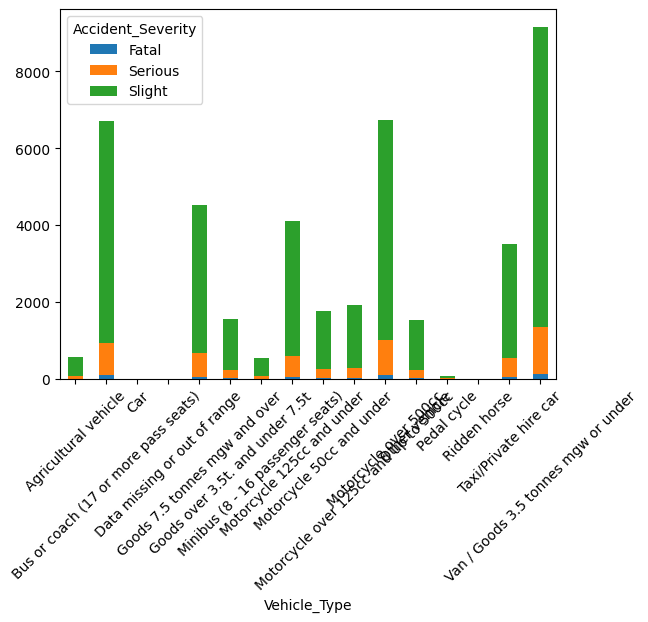

In [ ]:
no_car = during_2020[during_2020['Vehicle_Type'] != 'Car']
no_car_vehicle_severity = no_car.groupby(['Vehicle_Type','Accident_Severity']).size().unstack()

no_car_vehicle_severity.plot(kind='bar',stacked=True)
plt.xticks(rotation=45)
plt.show()

<h2>Now what is the common road surface condition in vehicle type car during 2020?</h2>


<h1>Insight No6. </h1>
<h3>In 2020, the majority of "car" type accidents occurred on dry road surfaces, accounting for 66.67% (85,266 incidents) of all cases far exceeding wet or damp conditions (30.49%), frost or ice (2.28%), snow (0.35%), and flooding (0.19%).</h3>

<Axes: xlabel='Road_Surface_Conditions'>

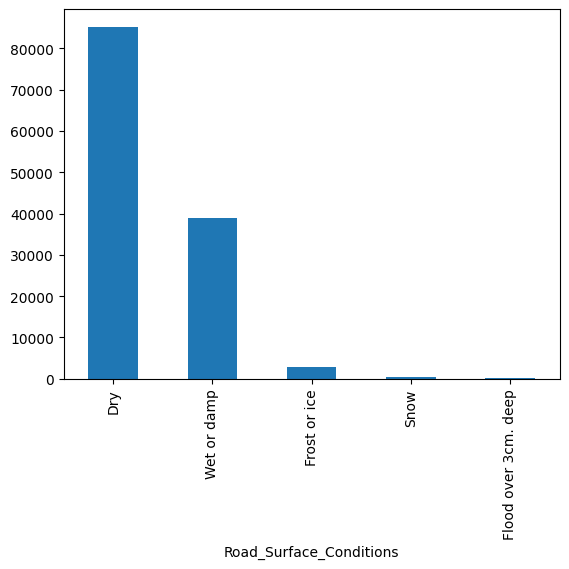

In [ ]:
car_2020 = during_2020[during_2020['Vehicle_Type'] == 'Car']
to_graph_car_2020 =car_2020['Road_Surface_Conditions'].value_counts()
to_graph_car_2020.plot(kind='bar')

<h3>Removing Dry from the graph for better comparison of other surface conditions</h3>


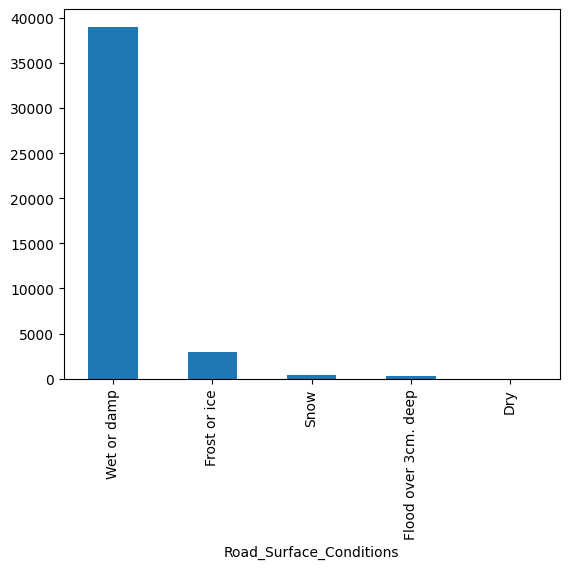

In [ ]:
no_dry_to_graph_car_2020 =car_2020[car_2020['Road_Surface_Conditions'] != 'Dry']
no_dry_to_graph_car_2020 = no_dry_to_graph_car_2020['Road_Surface_Conditions'].value_counts()
no_dry_to_graph_car_2020.plot(kind='bar')
plt.show()

<h2>What is the common Weather condition in vehicle type car during 2020?</h2>


<h1>Insight No7. </h1>
<h3>77.78% of all cases (99,486 incidents) occurred during fine weather conditions with no high winds, far exceeding other conditions such as raining no high winds (12.82%) and fine + high winds (1.67%). This highlights that favorable weather does not necessarily equate to safer driving conditions.</h3>

<Axes: xlabel='Weather_Conditions'>

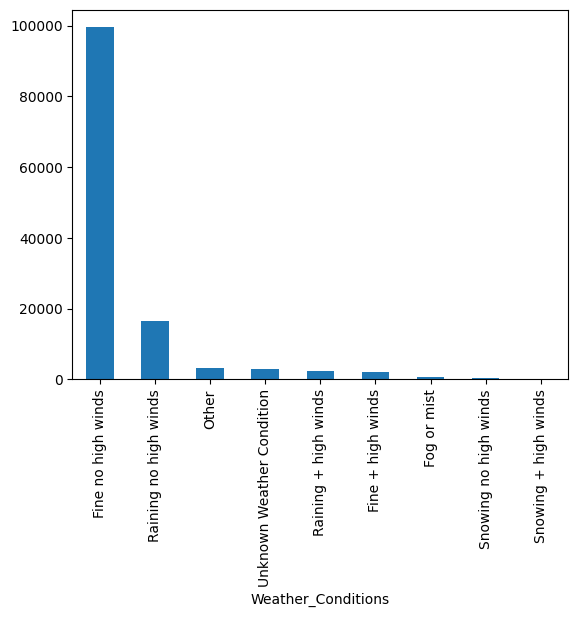

In [ ]:
graph_weather_2020 = car_2020['Weather_Conditions'].value_counts()
graph_weather_2020.plot(kind='bar')

<h2>what is the common District an accident will occur in vehicle type car during 2020?</h2>


<h1>Insight No.8 </h1>
<h3>The majority of accidents occurred in the Birmingham district, accounting for 2,048 incidents—the highest among all districts—followed by Leeds (1,794) and Manchester (1,370). </h3>

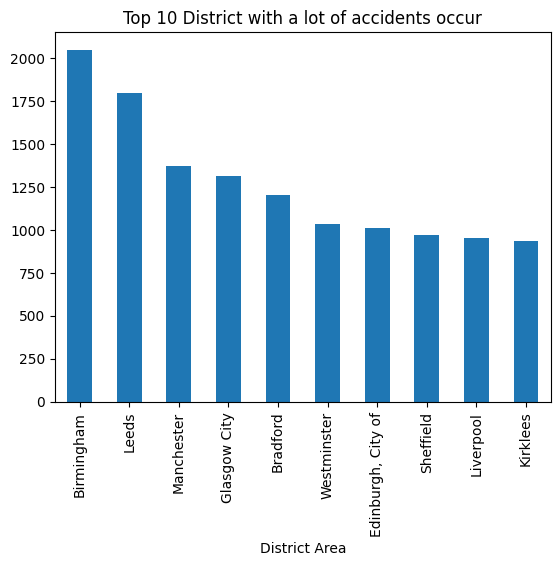

In [ ]:
car_destric_2020 = car_2020['District Area'].value_counts().head(10)
car_destric_2020.plot(kind='bar')
plt.title('Top 10 District with a lot of accidents occur')
plt.show()


<h2>what is the accident severity trends over the past few years do the fatality increases?</h2>


<h1>Insight No.9 </h1>
<h3>The data shows a consistent decline in fatal accidents from 2019 to 2022, with a total reduction of 42.9% over the four years. Specifically, fatalities dropped by 13.74% from 2019 (2,714 accidents) to 2020 (2,341), by 12.13% from 2020 to 2021 (2,057), and by a significant 24.69% from 2021 to 2022 (1,549).</h3>

C:\Users\steven\AppData\Local\Temp\ipykernel_20648\2431964720.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  years = accident.groupby(['Year','Accident_Severity']).size().unstack()


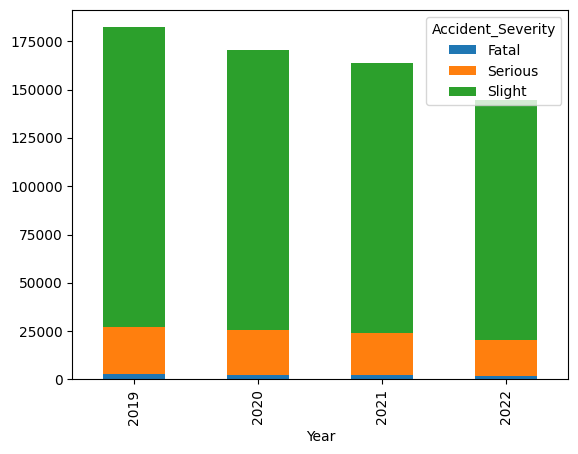

In [ ]:
years = accident.groupby(['Year','Accident_Severity']).size().unstack()
years.plot(kind='bar',stacked=True)
plt.show()

<h2>Which months have the highest/lowest number of accidents?</h2>


<h1>Insight No.10 </h1>
<h3>November recorded the highest number of accidents at 60,424, accounting for approximately 9.29% of the total annual accidents, while February had the lowest with 49,491 incidents, contributing 7.61%. Interestingly, the data shows that accident rates tend to peak during late autumn (October–November), possibly due to reduced daylight hours and worsening weather conditions.</h3>

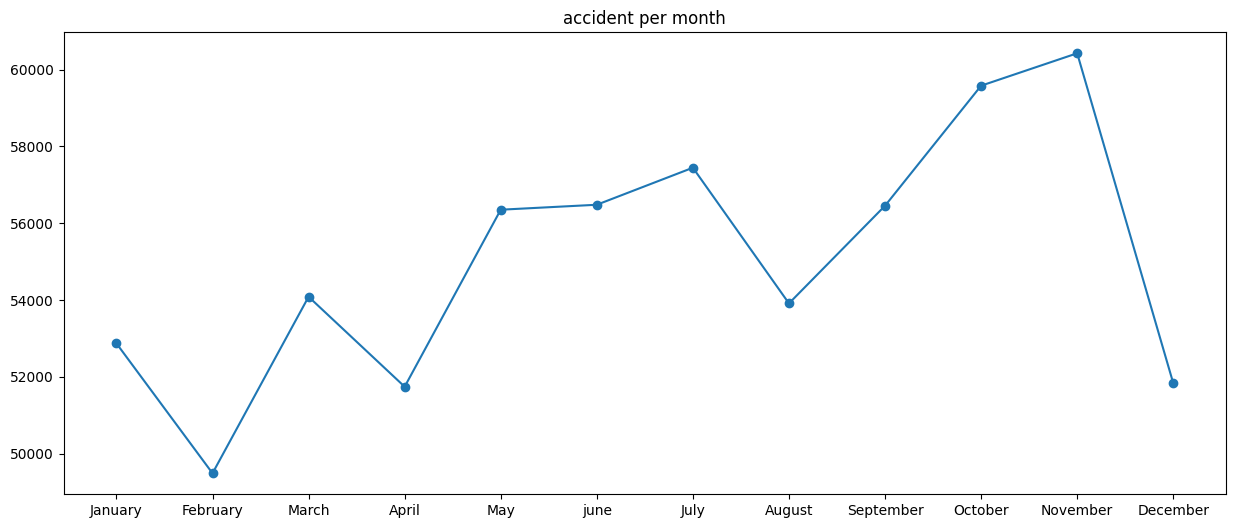

In [ ]:
accident_per_month = accident['month'].value_counts().sort_index()
month_names = {
    1: 'January', 2:'February', 3:'March', 4: 'April', 5:'May',6:'june',7:'July',8:'August',9:'September', 10: 'October', 11:'November', 12:'December'
}


accident_per_month.index = accident_per_month.index.map(month_names)

plt.figure(figsize=(15,6))
plt.plot(accident_per_month.index, accident_per_month.values,marker='o')

plt.title("accident per month")
plt.show()


<h3>Since the insight in answer number 10 indicates that the peak of accidents occurs in October and November, which coincide with the rainy season, the question arises: do weather conditions during these months affect the occurrence of accidents?</h3>


<h1>Insight No.11 </h1>
<h3>No, most accidents occurring during October and November happened under 'fine no high winds' weather conditions, accounting for 80.26% (47,822 incidents), while 'raining no high winds' accounted for only 12.78% (7,615 incidents). </h3>

In [ ]:


october_november = accident[accident['month'] == 10 & 11]
season_server_weather = october_november.groupby(['Weather_Conditions','Accident_Severity']).size().unstack()

C:\Users\steven\AppData\Local\Temp\ipykernel_20648\3558706206.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_server_weather = october_november.groupby(['Weather_Conditions','Accident_Severity']).size().unstack()


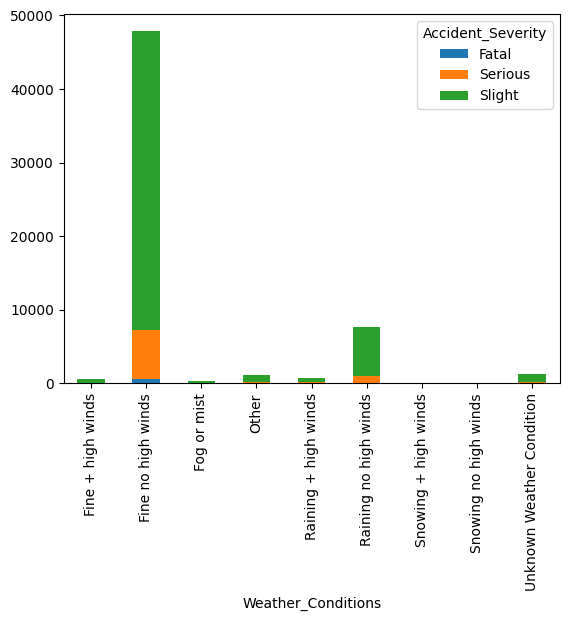

In [ ]:
season_server_weather.plot(kind='bar',stacked=True)
plt.show()

<h2>What month have the highest fatality rate in 2022>?</h2>


<h1>Insight No.12 </h1>
    <h3>The highest fatality rate occurs in August, with 160 fatalities accounting for 1.32% of total accidents—making it the month with the highest percentage of fatalities relative to total accidents.</h3>

C:\Users\steven\AppData\Local\Temp\ipykernel_20648\811886139.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  insight_12 = during_2022.groupby(['month','Accident_Severity']).size().unstack()


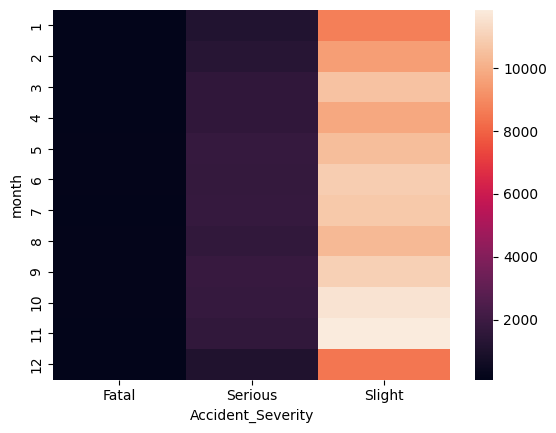

In [ ]:

insight_12 = during_2022.groupby(['month','Accident_Severity']).size().unstack()
sns.heatmap(insight_12)
plt.show()

<h2>What is the average number of casualty per serverity</h2>

<h1>Insight No.13 </h1>
<h3>Fatal accidents result in the highest average number of casualties (1.97), followed by serious accidents (1.48) and slight accidents (1.33). This highlights the disproportionate impact of fatal accidents on casualty rates, emphasizing the need for targeted interventions to reduce severe accidents.</h3>

C:\Users\steven\AppData\Local\Temp\ipykernel_20648\2307214486.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  compare_casualty_counts_severity = during_2019.groupby(['Accident_Severity'])['Number_of_Casualties'].mean()


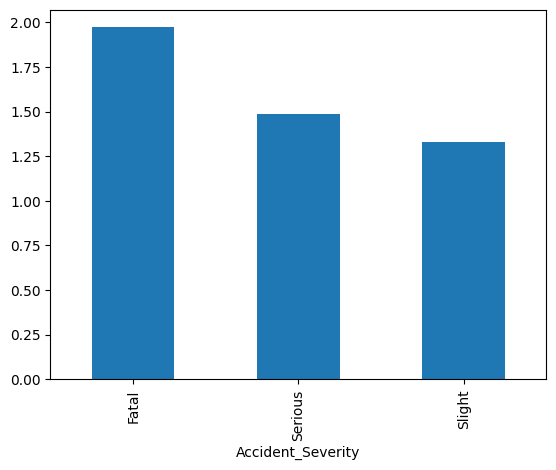

In [ ]:
compare_casualty_counts_severity = during_2019.groupby(['Accident_Severity'])['Number_of_Casualties'].mean()
compare_casualty_counts_severity.plot(kind='bar')
plt.show()

<h2>What weather conditon have the most number of accident</h2>

<h1>Insight No.14</h1>
<h3>The majority of accidents occurred under 'fine no high winds' weather conditions, accounting for 78.84% of all incidents (520,885 out of 660,679 total accidents), far exceeding other conditions such as 'raining no high winds' (12.06%) and 'snowing no high winds' (0.94%).</h3>

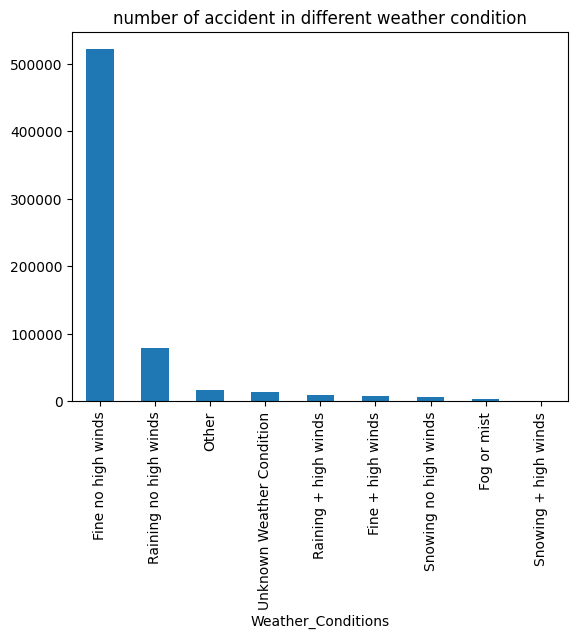

In [ ]:
insight_14 = accident['Weather_Conditions'].value_counts()
insight_14.plot(kind='bar')
plt.title('number of accident in different weather condition')
plt.show()

<h2>What is the average number of accident permonth?</h2>

<h1>Insight No.15</h1>
<h2>The data shows that an average of 55,056 accidents occurred per month.</h2>

In [ ]:

monthly_counts = accident['month'].value_counts()


average_accidents_per_month = monthly_counts.mean()

print(f"Average accidents per month: {average_accidents_per_month:.2f}")

Average accidents per month: 55056.58


<h2>What is the average number of accident year? </h2>

<h1>Insight No.16</h1>
<h2>The data shows that an average of 55,056 accidents occurred per year.</h2>

In [ ]:

Yearly_counts = accident['Year'].value_counts()


average_accidents_per_Year = Yearly_counts.mean()

print(f"Average accidents per Year: {average_accidents_per_Year:.2f}")

Average accidents per Year: 165169.75


<h2>Which road type has the highest number of accidents?</h2>

<h1>Insight No.17</h1>
<h2>The majority of accidents occurred on single carriageway roads, accounting for 74.49% of all incidents (492,143 out of 660,679 total accidents), far exceeding other road types such as dual carriageways (15.05%) and roundabouts (6.66%).</h2>

<Axes: xlabel='Road_Type'>

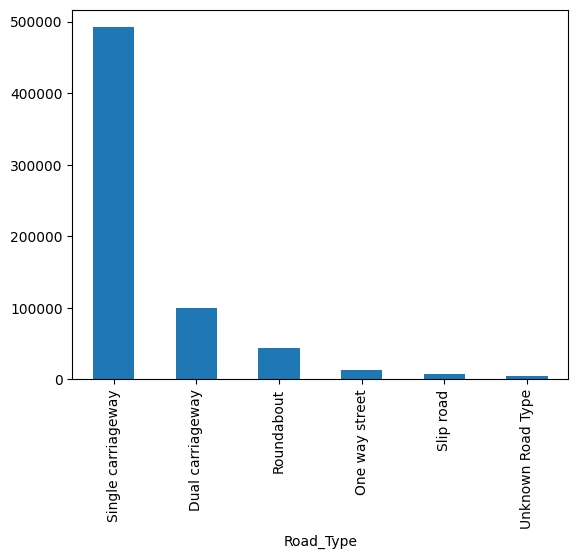

In [ ]:
insight_17 = accident['Road_Type'].value_counts()
insight_17.plot(kind='bar')

<h2>What is the distribution of the number of vehicles involved in accidents?</h2>


<h1>Insight No.18</h1>
<h2>Most Accidents Involve Two Vehicles, Accounting for 59.32% of Total Incidents (391,995 out of 660,781)</h2>

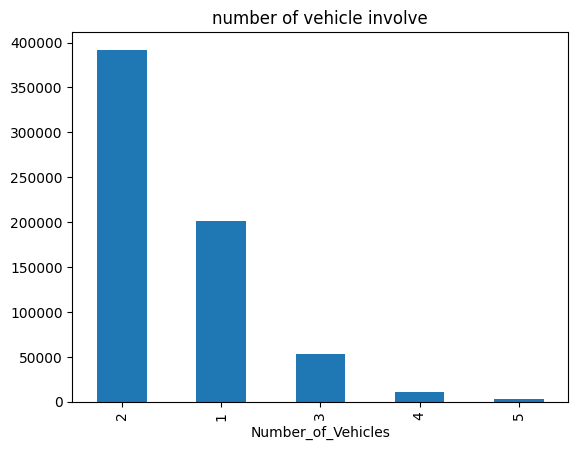

In [ ]:
insight_18 = accident['Number_of_Vehicles'].value_counts()
insight_18.head().plot(kind='bar')
plt.title('number of vehicle involve')
plt.show()

<h2>Is there a relationship between road type and accident severity?</h2>


<h1>Insight No.19</h1>
<h2>The majority of fatal accidents occurred on single carriageway roads, accounting for 75.36% of all fatalities (6,527 out of 8,661), while slip roads had the lowest number of fatalities at just 0.57% (49 incidents).</h2>

C:\Users\steven\AppData\Local\Temp\ipykernel_20648\3377225983.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  road_severity = accident.groupby(['Road_Type','Accident_Severity']).size()


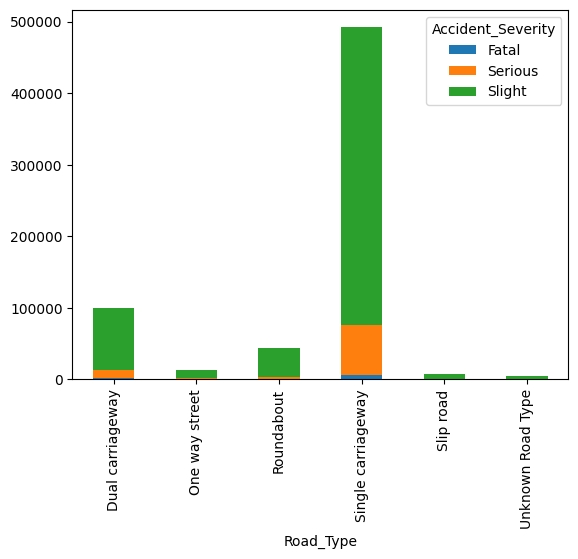

In [ ]:
road_severity = accident.groupby(['Road_Type','Accident_Severity']).size()
road_severity.unstack().plot(kind='bar',stacked=True)
plt.show()

<h2>How does number of vehicle involved affect the severity of the accident?</h2>


<h1>Insight No.20</h1>
<h2>single-vehicle accidents are have a higher chance of fatality per incident (1.93%) than two-vehicle ones (0.88%), while four-vehicle accidents top the list at 2.41%, though they happen less often. Using these percentages, you can estimate total fatalities if you know the number of accidents in each group.</h2>

C:\Users\steven\AppData\Local\Temp\ipykernel_20648\1924502693.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  insight_20= accident.groupby(['Number_of_Vehicles','Accident_Severity']).size().unstack()


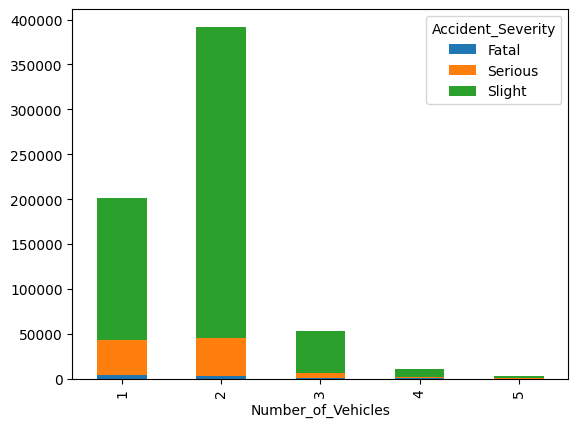

In [ ]:
insight_20= accident.groupby(['Number_of_Vehicles','Accident_Severity']).size().unstack()
insight_20.head().plot(kind='bar',stacked=True)
plt.show()

<h2>What type of car has the highest fatality rate, and which district has the highest number of fatal accidents?</h2>


<h1>Insight No.21</h1>
<h3>Highland has the highest number of fatal accidents, accounting for 30 incidents (7.1% of all districts). Among these, the majority involve car type, representing 23 out of 30 accidents (76.7%), followed by taxi/private hire cars and light goods vehicles, each accounting for 2 accidents (6.7%). Other vehicle types contribute minimally or not at all to the total.</h3>

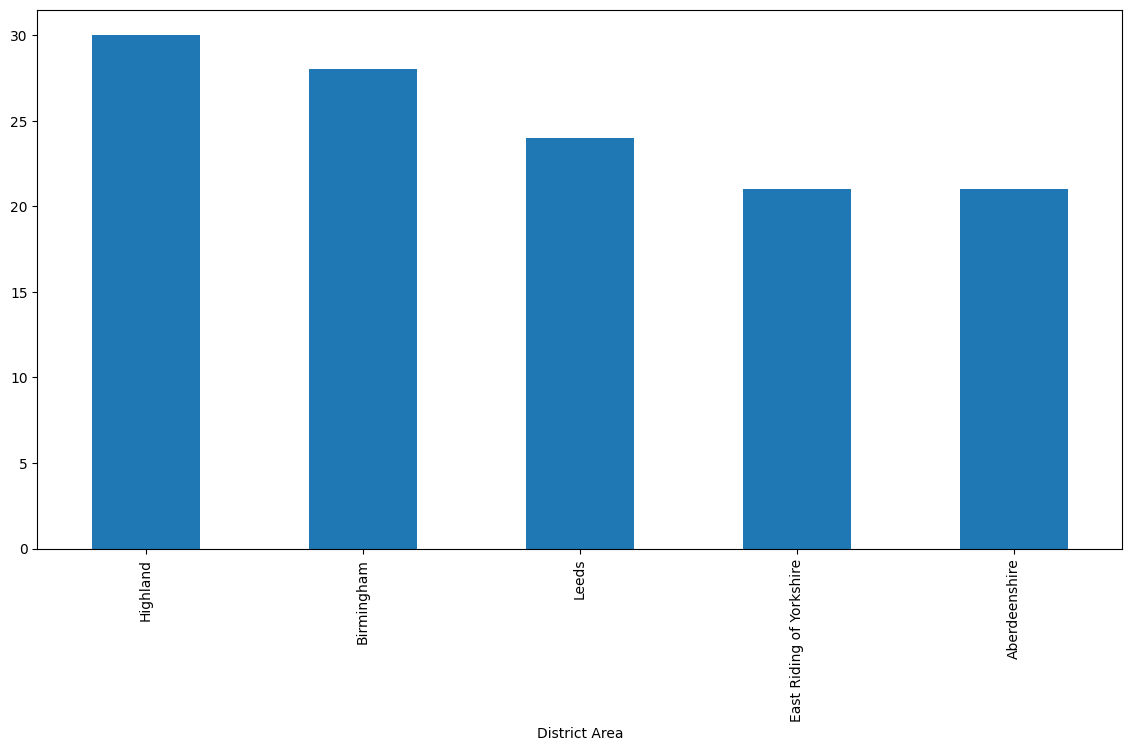

In [ ]:
si_fatal = during_2020[during_2020['Accident_Severity'] == 'Fatal']
getting_highland = si_fatal[si_fatal['District Area'] == 'Highland']
insight_21 = si_fatal['District Area'].value_counts()

plt.figure(figsize=(14,7))
insight_21.head().plot(kind='bar')
plt.show()

In [ ]:
getting_highland['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      23
Taxi/Private hire car                     2
Van / Goods 3.5 tonnes mgw or under       2
Goods 7.5 tonnes mgw and over             1
Other vehicle                             1
Motorcycle 50cc and under                 1
Bus or coach (17 or more pass seats)      0
Agricultural vehicle                      0
Motorcycle 125cc and under                0
Minibus (8 - 16 passenger seats)          0
Goods over 3.5t. and under 7.5t           0
Data missing or out of range              0
Motorcycle over 500cc                     0
Motorcycle over 125cc and up to 500cc     0
Ridden horse                              0
Pedal cycle                               0
Name: count, dtype: int64

<h2>Do night time condition have the highest fatality ? and what district have the highest accident in term of darkness condition</h2>


<h1>Insight No.22</h1>
<h3>Daylight conditions account for the lowest percentage of fatal accidents at 0.9%, while darkness conditions have a higher percentage at 3.1%.</h3>

<Axes: xlabel='Accident_Severity'>

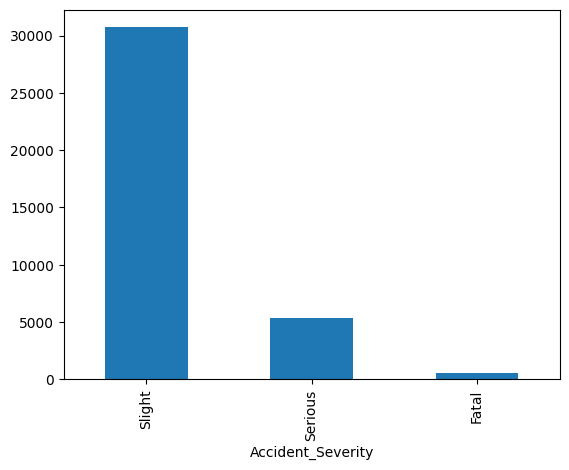

In [ ]:
light_2022 = during_2022[during_2022['Light_Conditions'] != 'Daylight']
darkness = light_2022['Accident_Severity']
darkness =darkness.value_counts()
darkness.plot(kind='bar')

In [ ]:
light_2022 = during_2022[during_2022['Light_Conditions'] == 'Daylight']
daylight = light_2022['Accident_Severity']
daylight.value_counts()

Accident_Severity
Slight     93377
Serious    13427
Fatal        964
Name: count, dtype: int64

<h1>Area analysis</h1>

C:\Users\steven\AppData\Local\Temp\ipykernel_20648\1158819410.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  district_year = accident.groupby(['District Area','Year']).size().reset_index(name='Accident Count')


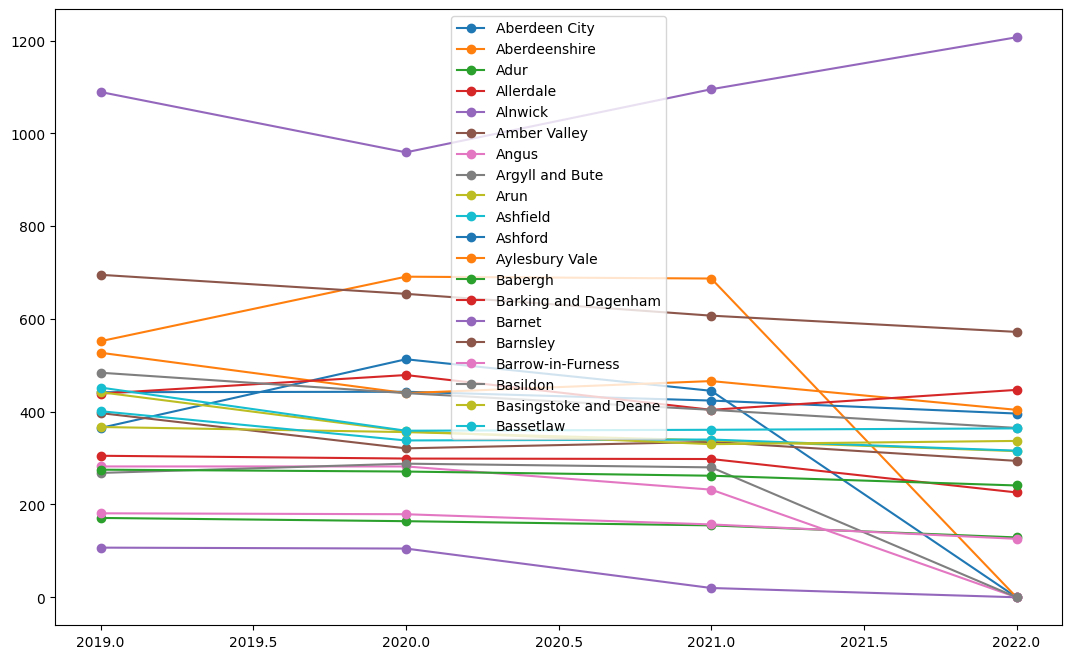

In [ ]:
district_year = accident.groupby(['District Area','Year']).size().reset_index(name='Accident Count')

pivot_table = district_year.pivot(index='Year', columns='District Area', values='Accident Count')



count = 0
for each_district in pivot_table:
    count += 1
    plt.plot(pivot_table.index,pivot_table[each_district], label=each_district, marker='o')
    if count == 20:
        break

plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()

In [ ]:
accident.groupby(['District Area','Year']).size().unstack()

C:\Users\steven\AppData\Local\Temp\ipykernel_20648\2639564110.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accident.groupby(['District Area','Year']).size().unstack()


Year,2019,2020,2021,2022
District Area,,,,
Aberdeen City,365,513,445,0
Aberdeenshire,552,691,687,0
Adur,171,164,155,129
Allerdale,305,299,298,226
Alnwick,107,105,20,0
...,...,...,...,...
Wychavon,366,389,323,283
Wycombe,502,449,397,381
Wyre,328,295,321,294


C:\Users\steven\AppData\Local\Temp\ipykernel_20648\152895984.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  car_road = accident.groupby(['Road_Type','Number_of_Casualties']).size().unstack()


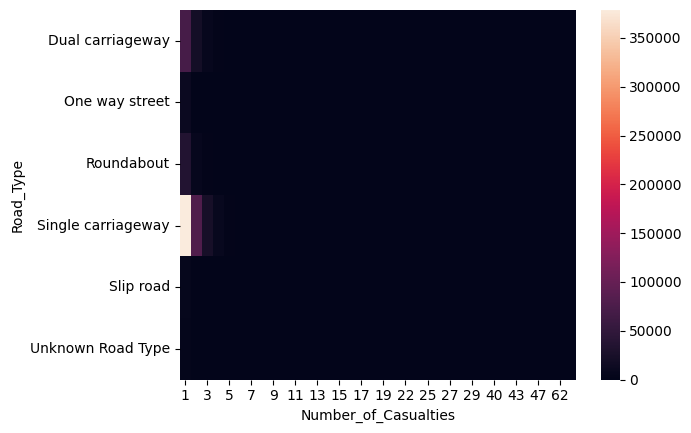

In [ ]:
car_road = accident.groupby(['Road_Type','Number_of_Casualties']).size().unstack()


sns.heatmap(car_road)
plt.show()

In [ ]:
accident.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Year', 'month', 'day_of_week'],
      dtype='object')

C:\Users\steven\AppData\Local\Temp\ipykernel_20648\4083173084.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


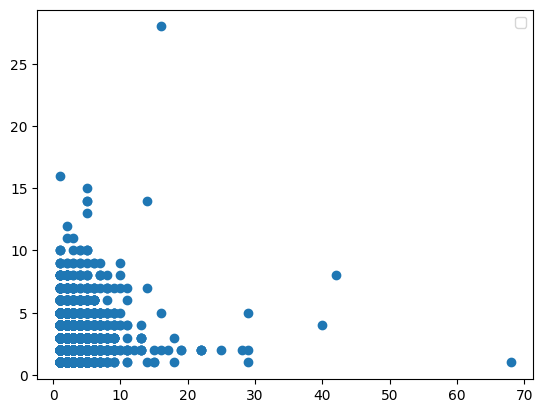

In [ ]:
meow = during_2019.groupby(['Number_of_Casualties','Number_of_Vehicles'])

plt.scatter(during_2019['Number_of_Casualties'],during_2019['Number_of_Vehicles'])

plt.legend()
plt.show()

